In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
sns.set(style='whitegrid')

import warnings
warnings.filterwarnings("ignore")

In [31]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("pranavshinde36/india-house-rent-prediction")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\vansh\.cache\kagglehub\datasets\pranavshinde36\india-house-rent-prediction\versions\1


In [32]:
path

'C:\\Users\\vansh\\.cache\\kagglehub\\datasets\\pranavshinde36\\india-house-rent-prediction\\versions\\1'

In [33]:
import os
os.listdir(path)

['data.csv']

In [34]:
df=pd.read_csv(os.path.join(path,"data.csv"))
df

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0
...,...,...,...,...,...,...,...,...,...,...
7686,"3 BHK Flat for Rent in Saket, New Delhi",Saket,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0
7687,"2 BHK Flat for Rent in Phase 7 JP Nagar, Banga...",Phase 7 JP Nagar,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0
7688,"2 BHK Flat for Rent in Malpani Vivanta, Balewa...",Balewadi,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0
7689,"1 BHK Flat for Rent in Shalimar bagh, New Delhi",Shalimar bagh,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0


In [35]:
df.to_csv("data/data.csv",index=False)

## Import Dataset

In [36]:
df = pd.read_csv("./data/data.csv")
# df_=pd.read_csv("./data/output.csv")
df.head()

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0


In [37]:
df.describe()

,area,beds,bathrooms,balconies,area_rate,rent
count,7691.000000,7691.000000,7691.000000,7691.000000,7691.000000,7.691000e+03
mean,1106.354180,2.208685,2.137043,0.817319,47.619989,5.479508e+04
std,1197.426843,0.993481,1.027677,1.243361,68.989657,9.742006e+04
min,2.000000,1.000000,0.000000,0.000000,2.000000,1.000000e+03
25%,600.000000,1.000000,1.000000,0.000000,21.000000,1.500000e+04
50%,900.000000,2.000000,2.000000,0.000000,31.000000,2.800000e+04
75%,1300.000000,3.000000,3.000000,2.000000,54.000000,5.700000e+04
max,70000.000000,10.000000,10.000000,10.000000,2586.000000,2.700000e+06


In [38]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7691 entries, 0 to 7690
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   house_type  7691 non-null   str    
 1   locality    7691 non-null   str    
 2   city        7691 non-null   str    
 3   area        7691 non-null   float64
 4   beds        7691 non-null   int64  
 5   bathrooms   7691 non-null   int64  
 6   balconies   7691 non-null   int64  
 7   furnishing  7691 non-null   str    
 8   area_rate   7691 non-null   float64
 9   rent        7691 non-null   float64
dtypes: float64(3), int64(3), str(4)
memory usage: 601.0 KB


In [39]:
# checking for null values
df.isnull().sum()

house_type    0
locality      0
city          0
area          0
beds          0
bathrooms     0
balconies     0
furnishing    0
area_rate     0
rent          0
dtype: int64

In [40]:
df.head(2)

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0


<Axes: xlabel='count', ylabel='city'>

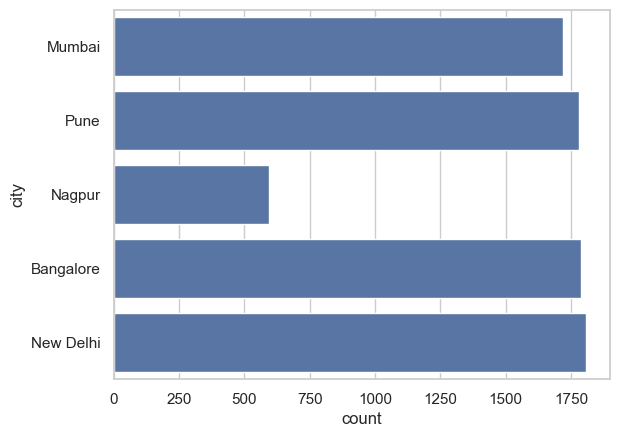

In [42]:
sns.countplot(df['city'])

### wheather nagapur is imbalanced so use imbalance lib to balance it

In [ ]:

df['house_type'][9]

'1 BHK Flat for Rent in Riverdale Suites, Kharadi, Pune'

In [57]:
import re
text=df['house_type'][0]
match=re.search("(\d+)\s*BHK",text,re.IGNORECASE)

if match:
    print(int(match.group(1)))
    print(type(int(match.group(1))))

2
<class 'int'>


In [58]:
# Extracting BHK from house_type

def bhk(text):
    match=re.search("(\d+)\s*BHK",text,re.IGNORECASE)

    if match:
        return int(match.group(1))
    return 0
    


In [59]:
df['bhk']=df['house_type'].apply(bhk)

In [60]:
df

,house_type,locality,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk
0,"2 BHK Flat for Rent in Oberoi Woods, Goregaon ...",Goregaon East,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2
1,"1 BHK Flat for Rent in Sapphire Lakeside, Powa...",Powai,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1
2,1 BHK House for Rent in Mundhwa Pune,Mundhwa,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,1
3,"2 BHK Flat for Rent in Hingna, Nagpur",Hingna,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2
4,1 BHK Flat for Rent in Unique Star Harsh Vihar...,Mira Road,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1
...,...,...,...,...,...,...,...,...,...,...,...
7686,"3 BHK Flat for Rent in Saket, New Delhi",Saket,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0,3
7687,"2 BHK Flat for Rent in Phase 7 JP Nagar, Banga...",Phase 7 JP Nagar,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0,2
7688,"2 BHK Flat for Rent in Malpani Vivanta, Balewa...",Balewadi,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0,2
7689,"1 BHK Flat for Rent in Shalimar bagh, New Delhi",Shalimar bagh,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0,1


In [63]:
#Droping the column house_type locality


df_droped=df.drop(['house_type','locality'],axis=1)
df_droped

,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk
0,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2
1,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1
2,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,1
3,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2
4,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1
...,...,...,...,...,...,...,...,...,...
7686,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0,3
7687,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0,2
7688,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0,2
7689,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0,1


In [69]:
df.groupby("city")['rent'].sum()

city
Bangalore    101509577.0
Mumbai       177446419.0
Nagpur        10719392.0
New Delhi     74686959.0
Pune          57066635.0
Name: rent, dtype: float64

<Axes: xlabel='area_rate', ylabel='rent'>

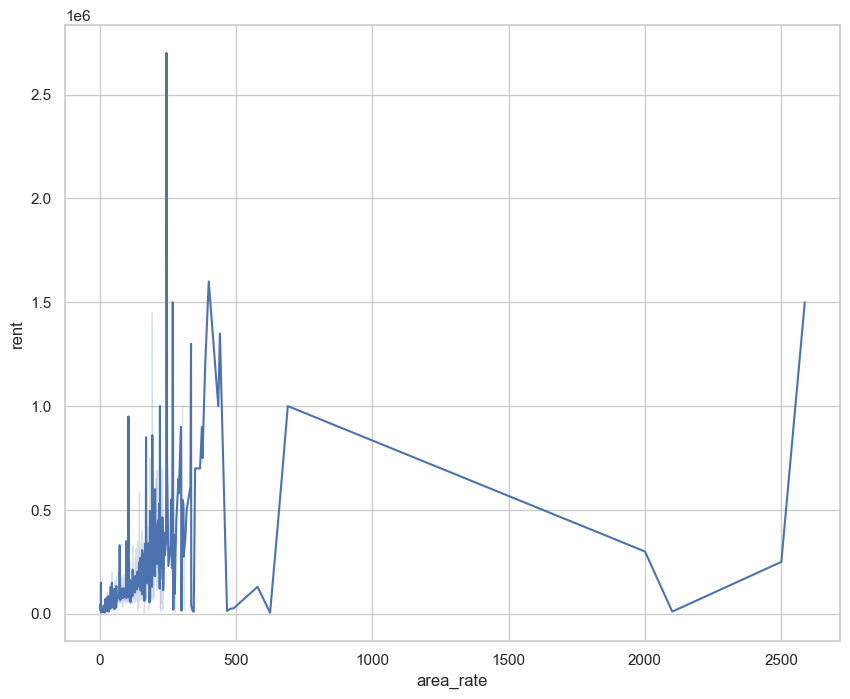

In [73]:
plt.figure(figsize=(10,8))

sns.lineplot(data=df,x="area_rate",y="rent")


### Areas near lower rate still reaching the peak

<Axes: xlabel='area_rate', ylabel='area'>

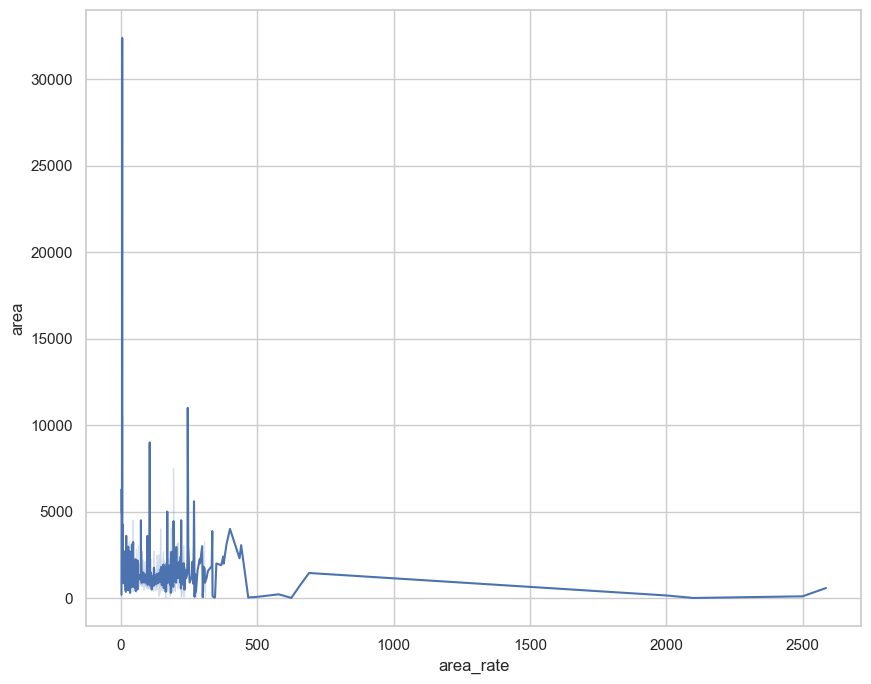

In [71]:
plt.figure(figsize=(10,8))

sns.lineplot(data=df,x="area_rate",y="area")

### area is large when area_per_rate is low means peoples by large area where area_rate is low

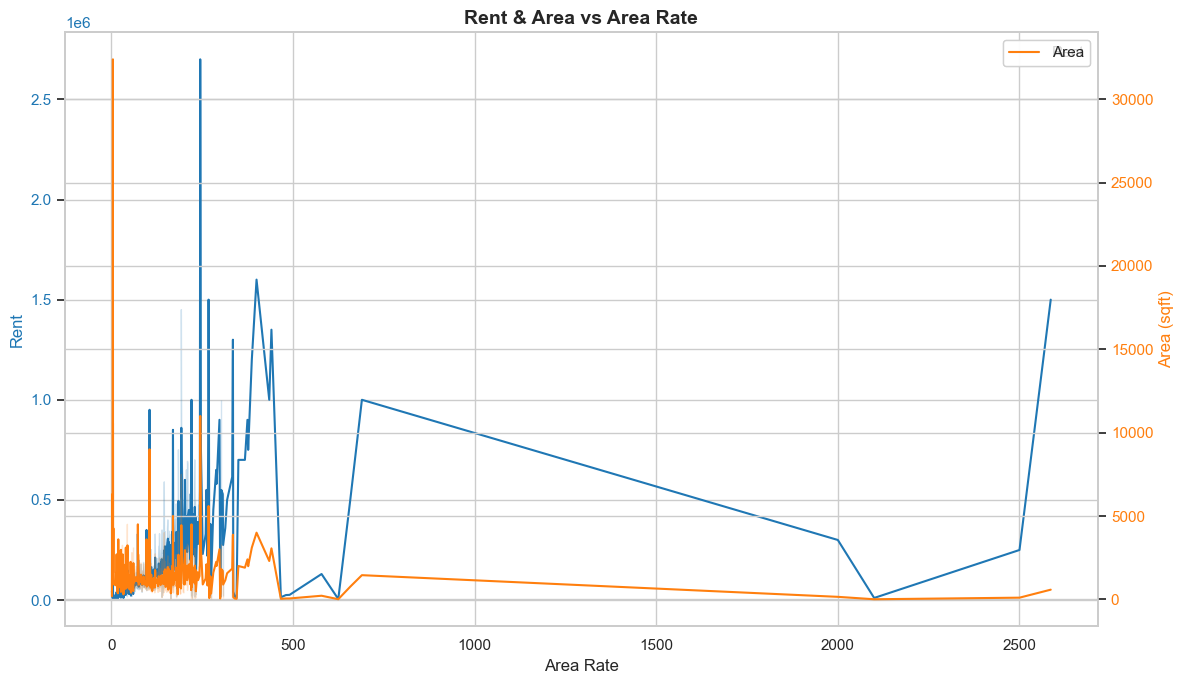

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,7))
sns.set_style("whitegrid")

ax1 = plt.gca()

# Line 1: Rent vs Area Rate
sns.lineplot(
    data=df,
    x="area_rate",
    y="rent",
    ax=ax1,
    color="tab:blue",
    label="Rent"
)

ax1.set_ylabel("Rent", color="tab:blue")
ax1.tick_params(axis='y', labelcolor="tab:blue")

# Second Y-axis
ax2 = ax1.twinx()

# Line 2: Area vs Area Rate
sns.lineplot(
    data=df,
    x="area_rate",
    y="area",
    ax=ax2,
    color="tab:orange",
    label="Area"
)

ax2.set_ylabel("Area (sqft)", color="tab:orange")
ax2.tick_params(axis='y', labelcolor="tab:orange")

# Title & labels
ax1.set_xlabel("Area Rate")
plt.title("Rent & Area vs Area Rate", fontsize=14, weight="bold")

plt.tight_layout()
plt.show()


### where ever the area rate is low peoples purchases more land and rante rate is also higher

In [75]:
df_droped

,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk
0,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2
1,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1
2,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,1
3,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2
4,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1
...,...,...,...,...,...,...,...,...,...
7686,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0,3
7687,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0,2
7688,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0,2
7689,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0,1


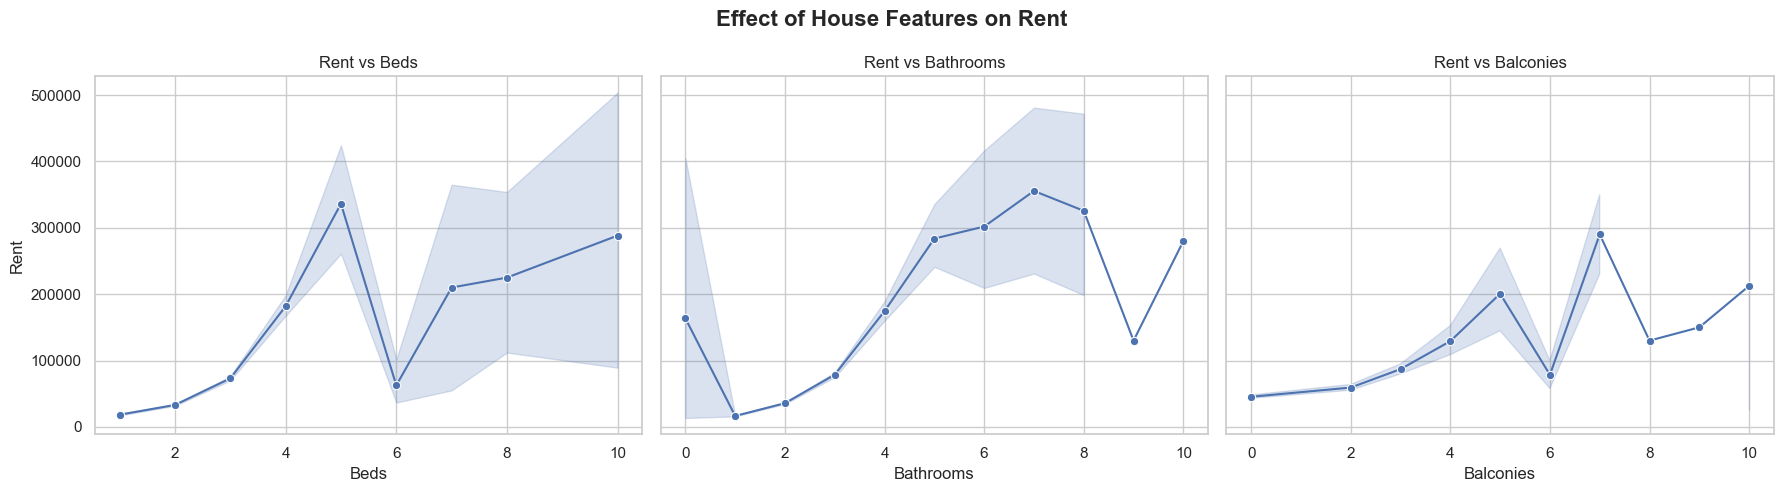

In [77]:

fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

sns.lineplot(data=df, x="beds", y="rent", ax=axes[0], marker="o")
axes[0].set_title("Rent vs Beds")
axes[0].set_xlabel("Beds")
axes[0].set_ylabel("Rent")

sns.lineplot(data=df, x="bathrooms", y="rent", ax=axes[1], marker="o")
axes[1].set_title("Rent vs Bathrooms")
axes[1].set_xlabel("Bathrooms")

sns.lineplot(data=df, x="balconies", y="rent", ax=axes[2], marker="o")
axes[2].set_title("Rent vs Balconies")
axes[2].set_xlabel("Balconies")

plt.suptitle("Effect of House Features on Rent", fontsize=16, weight="bold")
plt.tight_layout()
plt.show()


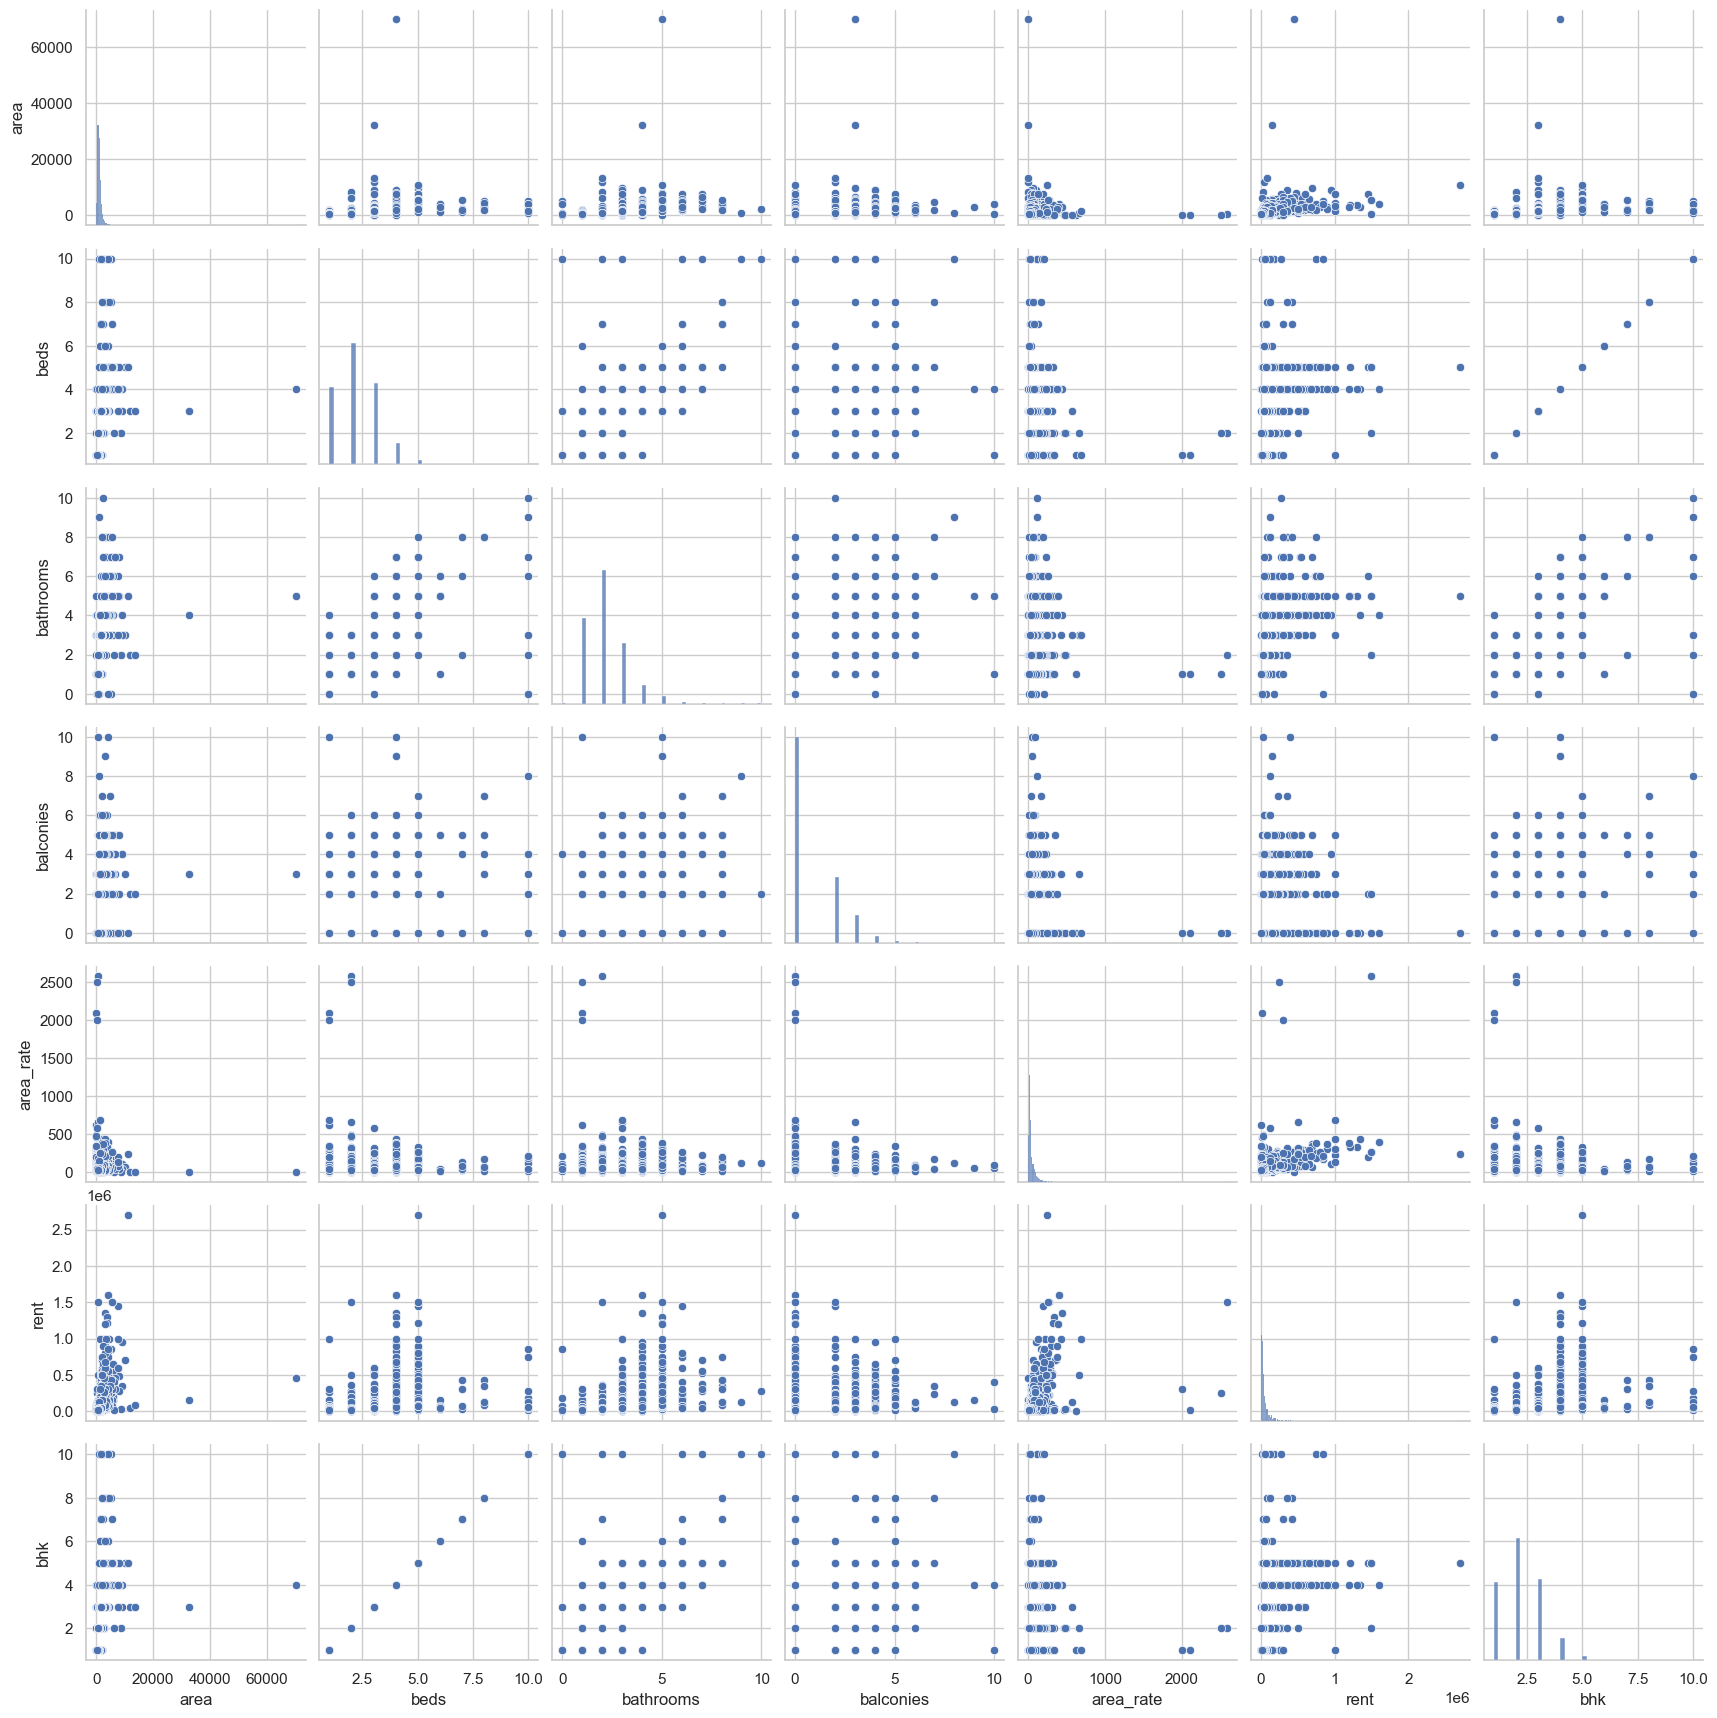

In [76]:
sns.pairplot(df_droped)

In [80]:
df_droped.drop(columns=['city',"furnishing"]).corr()

,area,beds,bathrooms,balconies,area_rate,rent,bhk
area,1.000000,0.516329,0.535668,0.296145,0.022209,0.433513,0.516329
beds,0.516329,1.000000,0.850310,0.418587,0.111820,0.473695,1.000000
bathrooms,0.535668,0.850310,1.000000,0.442145,0.160051,0.532681,0.850310
balconies,0.296145,0.418587,0.442145,1.000000,-0.004592,0.179181,0.418587
area_rate,0.022209,0.111820,0.160051,-0.004592,1.000000,0.507104,0.111820
rent,0.433513,0.473695,0.532681,0.179181,0.507104,1.000000,0.473695
bhk,0.516329,1.000000,0.850310,0.418587,0.111820,0.473695,1.000000


<Axes: >

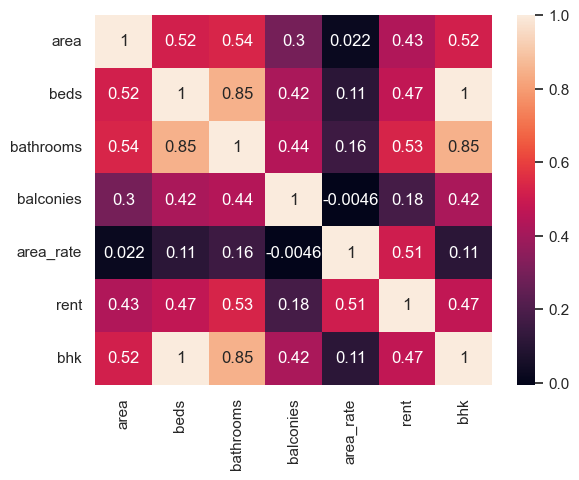

In [82]:
sns.heatmap(df_droped.drop(columns=['city',"furnishing"]).corr(),annot=True)

<Axes: >

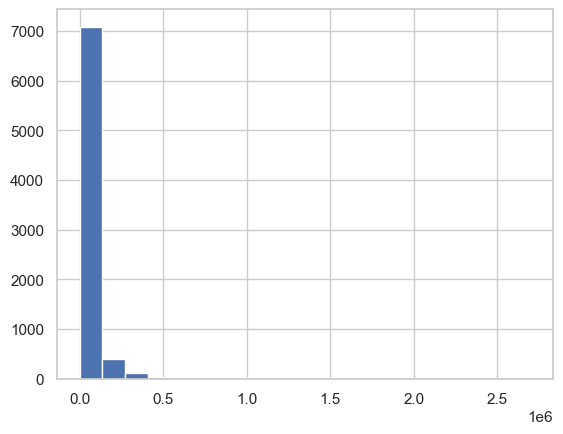

In [83]:
# checking distribution for age col
df_droped['rent'].hist(bins=20)

<Axes: >

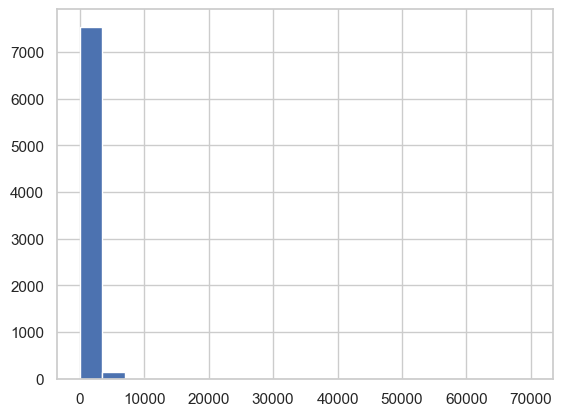

In [84]:
# checking distribution for age col
df_droped['area'].hist(bins=20)

In [85]:
df_droped

,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk
0,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2
1,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1
2,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,1
3,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2
4,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1
...,...,...,...,...,...,...,...,...,...
7686,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0,3
7687,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0,2
7688,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0,2
7689,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0,1


In [86]:
# Which city is expensive

df_droped.groupby("city")['area_rate'].mean()

city
Bangalore    36.106704
Mumbai       95.988365
Nagpur       17.278992
New Delhi    40.018990
Pune         30.340079
Name: area_rate, dtype: float64

<Axes: xlabel='city', ylabel='area_rate'>

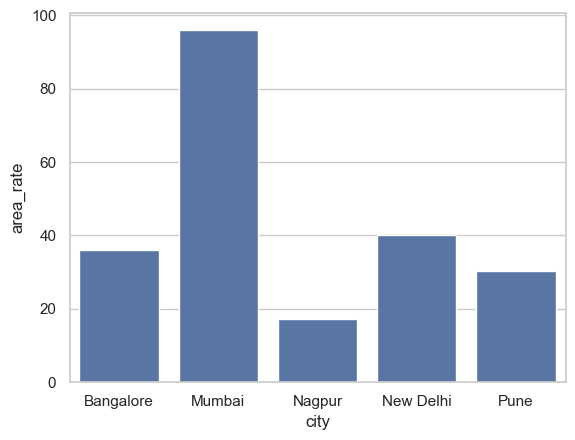

In [87]:
sns.barplot(df_droped.groupby("city")['area_rate'].mean())

<Axes: xlabel='city', ylabel='rent'>

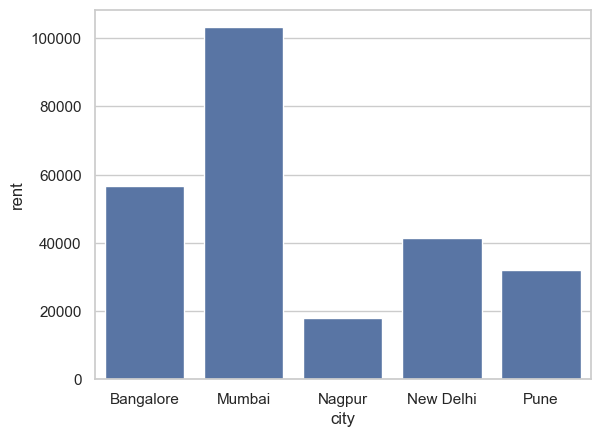

In [88]:
sns.barplot(df_droped.groupby("city")['rent'].mean())

In [89]:
df_droped

,city,area,beds,bathrooms,balconies,furnishing,area_rate,rent,bhk
0,Mumbai,897.0,2,2,0,Semi-Furnished,134.0,120000.0,2
1,Mumbai,490.0,1,1,0,Semi-Furnished,82.0,40000.0,1
2,Pune,550.0,1,1,0,Unfurnished,22.0,12000.0,1
3,Nagpur,1000.0,2,2,0,Unfurnished,8.0,8000.0,2
4,Mumbai,595.0,1,1,0,Unfurnished,25.0,15000.0,1
...,...,...,...,...,...,...,...,...,...
7686,New Delhi,1750.0,3,3,0,Furnished,27.0,47000.0,3
7687,Bangalore,1050.0,2,2,2,Semi-Furnished,27.0,28000.0,2
7688,Pune,734.0,2,2,2,Unfurnished,48.0,35000.0,2
7689,New Delhi,400.0,1,1,0,Semi-Furnished,38.0,15000.0,1


<Axes: xlabel='furnishing', ylabel='rent'>

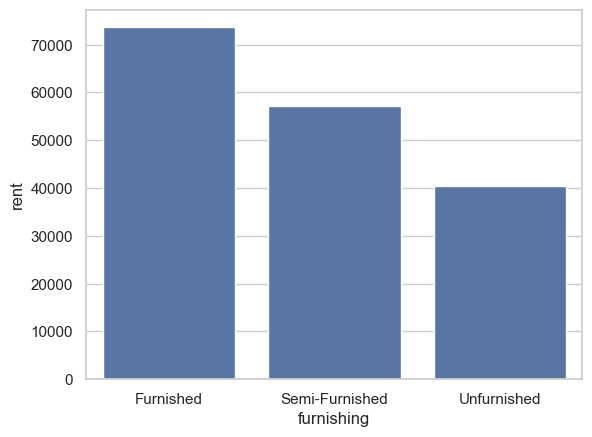

In [93]:
sns.barplot(df.groupby("furnishing")['rent'].mean())